<a href="https://colab.research.google.com/github/Jasleen8801/text_mining/blob/main/Labsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Mining with Word Embedding

Objective:



1.   Understand the concept of word embeddings and their role in text mining.

2.   Implement word embeddings using popular Python libraries.

3.   Apply word embeddings to a text mining task.


Task 1: Setting Up the Environment

1.Install the required libraries:

In [46]:
!pip install nltk gensim scikit-learn pandas matplotlib


2. Import the necessary modules:

In [2]:
import nltk
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

Task 2: Data Preprocessing

1. Load the text data:

In [3]:
# Sample text data
text_data = [
    "Natural language processing is a branch of artificial intelligence.",
    "Word embeddings are a type of word representation.",
    "Text mining involves extracting meaningful information from text.",
    "Machine learning algorithms are used for text classification."
]

2. Tokenize the text data:

In [16]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

tokenized_data = [word_tokenize(sentence.lower()) for sentence in text_data]
print(tokenized_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...


[['natural', 'language', 'processing', 'is', 'a', 'branch', 'of', 'artificial', 'intelligence', '.'], ['word', 'embeddings', 'are', 'a', 'type', 'of', 'word', 'representation', '.'], ['text', 'mining', 'involves', 'extracting', 'meaningful', 'information', 'from', 'text', '.'], ['machine', 'learning', 'algorithms', 'are', 'used', 'for', 'text', 'classification', '.']]


[nltk_data]   Unzipping corpora/stopwords.zip.


Task 3: Training Word Embeddings

1. Train a Word2Vec model:

In [5]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

2. Explore the Word2Vec model:

In [6]:
# Get the vocabulary
vocab = list(model.wv.index_to_key)
print(vocab)

# Get the vector for a specific word
word_vector = model.wv['word']
print(word_vector)

['.', 'text', 'are', 'a', 'of', 'word', 'classification', 'language', 'processing', 'is', 'branch', 'artificial', 'intelligence', 'embeddings', 'type', 'for', 'representation', 'mining', 'involves', 'extracting', 'meaningful', 'information', 'from', 'machine', 'learning', 'algorithms', 'used', 'natural']
[-8.7274825e-03  2.1301615e-03 -8.7354420e-04 -9.3190884e-03
 -9.4281426e-03 -1.4107180e-03  4.4324086e-03  3.7040710e-03
 -6.4986930e-03 -6.8730675e-03 -4.9994122e-03 -2.2868442e-03
 -7.2502876e-03 -9.6033178e-03 -2.7436293e-03 -8.3628409e-03
 -6.0388758e-03 -5.6709289e-03 -2.3441375e-03 -1.7069972e-03
 -8.9569986e-03 -7.3519943e-04  8.1525063e-03  7.6904297e-03
 -7.2061159e-03 -3.6668312e-03  3.1185520e-03 -9.5707225e-03
  1.4764392e-03  6.5244664e-03  5.7464195e-03 -8.7630618e-03
 -4.5171441e-03 -8.1401607e-03  4.5956374e-05  9.2636338e-03
  5.9733056e-03  5.0673080e-03  5.0610625e-03 -3.2429171e-03
  9.5521836e-03 -7.3564244e-03 -7.2703874e-03 -2.2653891e-03
 -7.7856064e-04 -3.2161

Task 4: Visualizing Word Embeddings

1. Reduce dimensions using PCA:

In [7]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

2. Plot the word vectors:

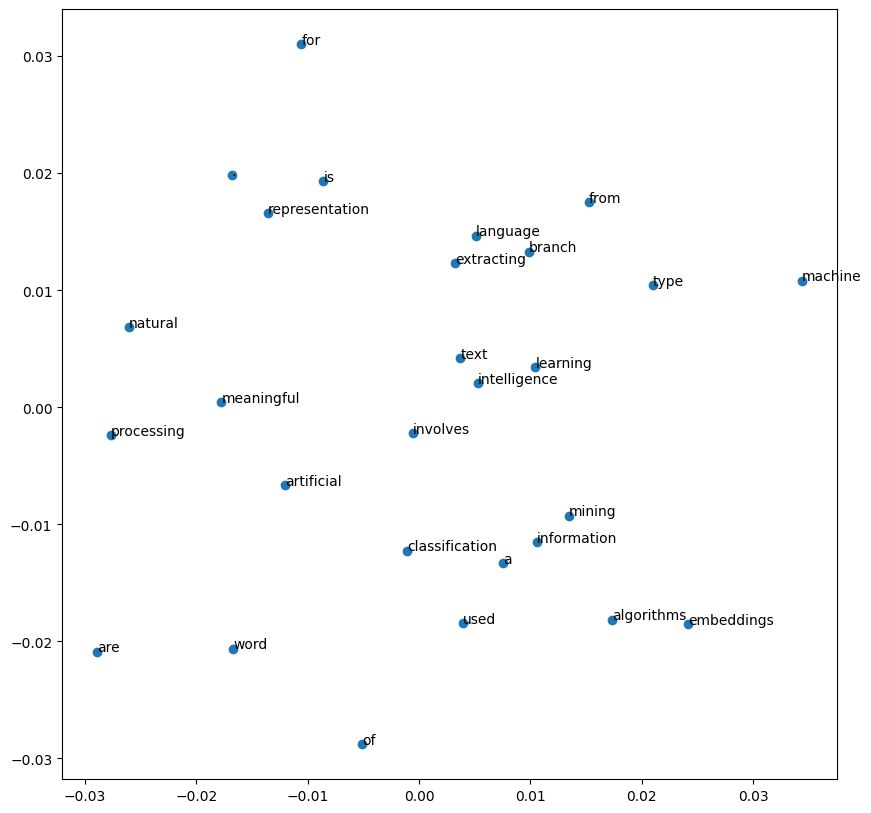

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

Task 5: Applying Word Embeddings to a Text Mining Task

1. Load a sample dataset:

In [9]:
# Sample dataset with text and labels
import numpy as np
data = {
    'text': [
        "I love programming in Python",
        "Natural language processing is fascinating",
        "Machine learning is transforming industries",
        "Python is great for data science"
    ],
    'label': [1, 1, 0, 0]
}
df = pd.DataFrame(data)

2. Preprocess the text data:

In [10]:
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

3. Convert text data to vectors:

In [11]:
def get_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['vector'] = df['tokenized_text'].apply(lambda x: get_vector(x, model))

4. Train a simple classifier:

In [12]:
X = np.array(df['vector'].tolist())
y = df['label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.0


Why were we experiencing zero accuracy?
1. Small Dataset: The sample dataset is very small, which may lead to poor performance. For meaningful results, you should use a larger dataset.
2. Model Parameters: Fine-tuning Word2Vec parameters might help.
3. Balanced Data: Ensure that your data is balanced between classes.


Problem 1: Try Word2Vec processing with classifier on a large dataset.

Problem 2: Implement GloVe embeddings and compare the results with word2vec.

Problem 3: Implement BERT on the IMDb dataset and compare its performance with the methods mentioned above.

In [13]:
!pip install pandas

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('movie_review.csv')

y_train = data['tag'].apply(lambda x: 1 if x == 'pos' else 0)
X_train, X_test, y_train, y_test = train_test_split(data['text'], y_train, test_size=0.2, random_state=42)

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
  text = text.lower()
  text = ''.join([word for word in text if word not in string.punctuation])
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [35]:
from gensim.models import Word2Vec

sentences = [word_tokenize(sentence) for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [39]:
# Vectorize the text data
import numpy as np

def vectorize(sentence):
  vectors = [w2v_model.wv[word] for word in sentence if word in w2v_model.wv]
  if len(vectors) > 0:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(w2v_model.vector_size)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [40]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.5078028430160693
Precision: 0.25786372737520263
Recall: 0.5078028430160693
F1 score: 0.3420390518158142


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
sentences = ["Word embeddings capture semantic meanings.",
             "GloVe is an impactful word embedding model."]

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

In [49]:
! pip install glove-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.0/327.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for glove-python3: filename=glove_python3-0.1.0-cp310-cp310-linux_x86_64.whl size=1065513 sha256=e10db7ccbd6927c43888d26bd4a1f6cc737d38cd6e1b541af191ac7872138bba
  Stored in directory: /root/.cache/pip/wheels/fe/2f/79/34314d44a0907e90e323c8c182ec23f126eb460829e02d98cf
Successfully built glove-python3


In [51]:
# GloVe
from glove import Corpus, Glove

# Sample text data
text_data = [
    "Natural language processing is a branch of artificial intelligence.",
    "Word embeddings are a type of word representation.",
    "Text mining involves extracting meaningful information from text.",
    "Machine learning algorithms are used for text classification."
]

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in text_data]

corpus = Corpus()
corpus.fit(tokenized_sentences, window=10)

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

for word in glove.dictionary.keys():
  print(word, glove.word_vectors[glove.dictionary[word]])

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
natural [-4.06910558e-03 -4.73187535e-03 -3.00276639e-03 -3.31815305e-03
 -6.78942999e-04  1.00785891e-03 -4.71577983e-03 -4.43198102e-03
 -7.55238463e-04  2.20302647e-03 -2.32058448e-03 -3.48214141e-03
 -2.63309861e-03 -2.90216408e-03 -7.38726789e-04  3.24680236e-03
 -1.83695940e-03  3.57429079e-03 -4.41148462e-03  3.59925141e-04
  2.94965157e-03  4.96005485e-03 -2.26524332e-03  5.06086613e-03
 -5.15918152e-03 -1.63260291e-05  1.08848288e-03 -3.71054694e-03
  1.42533854e-03  2.44670105e-03  3.72992140e-03 -9.62820333e-04
 -1.93906645e-04  2.21238456e-03  2.76633133e-03 -1.05594376e-03
  1.47716350e-03 -4.49676111e-03 -1.31548579e-03  4.77999165e-03
 -3.80641395e-03 -2.68120827e-03  2.0

In [52]:
!pip3 install torch torchaudio torchvision torchtext torchdata

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [53]:
import pandas as pd
import re
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

df = pd.read_csv('IMDB Dataset.csv')
df = df.head(15000)

df_sentiment = [1 if sentiment == 'positive' else 0 for sentiment in df['sentiment']]
def process(x):
  x = re.sub('[,\.!?:()"]', '', x)
  x = re.sub('<.*?>', ' ', x)
  x = re.sub('http\S+', ' ', x)
  x = re.sub('[^a-zA-Z0-9]', ' ', x)
  x = re.sub('\s+', ' ', x)
  return x.lower().strip()

df['review'] = df['review'].apply(lambda x: process(x))

train, test = train_test_split(df, test_size=0.2)

train_sentences = train['review'].values
test_sentences = test['review'].values
train_labels = train['sentiment'].values
test_labels = test['sentiment'].values

train.head()

,review,sentiment
10699,how has this piece of crap stayed on tv this l...,negative
4089,highly enjoyable very imaginative and filmic f...,positive
3843,ariauna albright is a really good actress but ...,negative
2606,this movie was horrible if it had never been m...,negative
8920,i really enjoyed the first film and when it tu...,negative


In [54]:
!pip install transformers

In [55]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [56]:
def generate_data(data, labels):
  input_ids = []
  attention_masks = []

  for sent in data:
    encoded_dict = tokenizer.encode_plus(sent, add_special_tokens = True, max_length = 64, pad_to_max_length = True, return_attention_mask = True, return_tensors = 'pt',)
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)

  return input_ids, attention_masks, labels

In [60]:
import torch
train_input_ids, train_attention_masks,train_labels = generate_data(train_sentences,train_labels)
test_input_ids, test_attention_masks,test_labels = generate_data(test_sentences,test_labels)

print('Original: ', train_sentences[0])
print('Token IDs:', train_input_ids[0])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [63]:
import pandas as pd
import re
import torch
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Load dataset
df = pd.read_csv('IMDB Dataset.csv')
df = df.head(15000)

# Convert sentiment labels to binary
df['sentiment'] = [1 if sentiment == 'positive' else 0 for sentiment in df['sentiment']]

# Text preprocessing function
def process(x):
    x = re.sub('[,\.!?:()"]', '', x)
    x = re.sub('<.*?>', ' ', x)
    x = re.sub('http\S+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = re.sub('\s+', ' ', x)
    return x.lower().strip()

df['review'] = df['review'].apply(lambda x: process(x))

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2)

train_sentences = train['review'].values
test_sentences = test['review'].values
train_labels = train['sentiment'].values.astype(int)
test_labels = test['sentiment'].values.astype(int)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Set max_length to ensure consistent padding/truncation
MAX_LEN = 64

# Function to generate input IDs and attention masks
def generate_data(data, labels):
    input_ids = []
    attention_masks = []

    for sent in data:
        encoded_dict = tokenizer.encode_plus(
            sent,
            add_special_tokens=True,
            max_length=MAX_LEN,  # Set max_length for consistent length
            padding='max_length',  # Ensure padding to max_length
            truncation=True,  # Ensure truncation to max_length
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels, dtype=torch.long)

    return input_ids, attention_masks, labels

train_input_ids, train_attention_masks, train_labels = generate_data(train_sentences, train_labels)
test_input_ids, test_attention_masks, test_labels = generate_data(test_sentences, test_labels)

print('Original: ', train_sentences[0])
print('Token IDs:', train_input_ids[0])


Original:  after seeing this routine by john leguizamo i finally realize why he is such a talent i enjoy great stage work and this is stage work at its best i cannot label it as a stand up routine because leguizamo is so intense when playing the different characters the only time he breaks character is when it is necessary for him to complete his part in which he does so coolly that you cannot help but appreciate his talents i wasn t really sure how i felt about him as an actor but freak solidified my appreciation of him for those out there that have not had the opportunity to see this show i feel for you definitely check it out it is one of the nest routines i have ever seen ranks with eddie murphy bill cosby and chris rock four stars and more
Token IDs: tensor([  101,  2044,  3773,  2023,  9410,  2011,  2198,  4190, 10179, 20722,
         2080,  1045,  2633,  5382,  2339,  2002,  2003,  2107,  1037,  5848,
         1045,  5959,  2307,  2754,  2147,  1998,  2023,  2003,  2754,  2147,


In [64]:
batch_size = 32

train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

In [66]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
  "bert-base-uncased",
  num_labels = 2,
  output_attentions = False,
  output_hidden_states = False,
)

# model.cuda()

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [67]:
from transformers import get_linear_schedule_with_warmup

epochs = 4

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [68]:
import numpy as np

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round((elapsed)))
  return str(datetime.timedelta(seconds=elapsed_rounded))



In [71]:
import random
import numpy as np
import torch
import time

# Set random seeds for reproducibility
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)

# Initialize training statistics
training_stats = []

# Record the total training time
total_t0 = time.time()

# Number of epochs (define this variable if not already defined)
epochs = 4  # Example value, change as per your requirement

for epoch_i in range(0, epochs):
    print(f'======== Epoch {epoch_i + 1} / {epochs} ========')
    t0 = time.time()
    total_train_loss = 0
    model.train()

    # Training loop
    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print(f'Batch {step} of {len(train_dataloader)}. Elapsed: {elapsed}')

        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]

        # Zero the gradients
        model.zero_grad()

        # Forward pass
        loss, logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

        # Accumulate the training loss
        total_train_loss += loss.item()

        # Backward pass
        loss.backward()

        # Clip the norm of the gradients to 1.0
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and learning rate
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over the training data
    avg_train_loss = total_train_loss / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print(f'Average training loss: {avg_train_loss}')
    print(f'Training epoch took: {training_time}')

    # Validation phase
    t0 = time.time()
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in test_dataloader:
        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]

        # Disable gradient calculation for validation
        with torch.no_grad():
            loss, logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

        total_eval_loss += loss.item()

        # Move logits and labels to CPU for accuracy calculation
        logits = logits.detach().numpy()
        label_ids = b_labels.numpy()

        # Calculate the accuracy for this batch
        total_eval_accuracy += flat_accuracy(logits, label_ids)

    # Calculate the average accuracy and loss over the validation data
    avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
    print(f'Accuracy: {avg_val_accuracy}')

    avg_val_loss = total_eval_loss / len(test_dataloader)
    validation_time = format_time(time.time() - t0)

    print(f'Validation Loss: {avg_val_loss}')
    print(f'Validation epoch took: {validation_time}')


======== Epoch 1 / 4 ========


AttributeError: 'str' object has no attribute 'item'